<center> 
    
# Python For Quantum Mechanics
# Week 6: Scipy Optimization

</center>

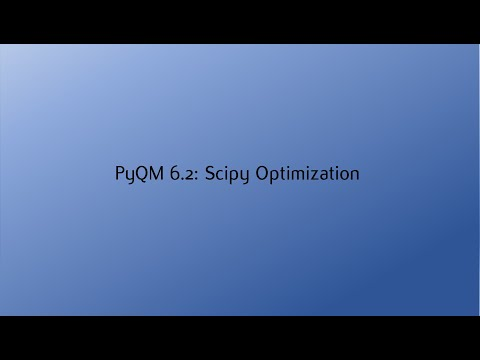

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('p2ohSsd1KTg',width=700, height=400)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy
from scipy import optimize

## Function Minimum

In [10]:
def f(b):
    return -(.6*np.log(1+b[0]-b[1]-b[2])+.3*np.log(1-b[0]+2*b[1]-b[2])+.1*np.log(1-b[0]-b[1]+4*b[2]))

In [23]:
from scipy.optimize import Bounds
bounds = Bounds([0.0, 1.0], [0.0, 1.0],[0.0, 1.0])

initial_guess = np.array([0.0,0.0,0.0])
result = optimize.minimize(f, initial_guess, bounds=bounds)
print(result)

IndexError: index 2 is out of bounds for axis 0 with size 2

Given some function we are able to find a local minimum using `scipy.optimize.fmin(f,x0)`, where `f` is the function in question, `x0` is an initial guess.

In [50]:
def f(x):
    return x**4 + x**3 + x**2 - 7*x + 10

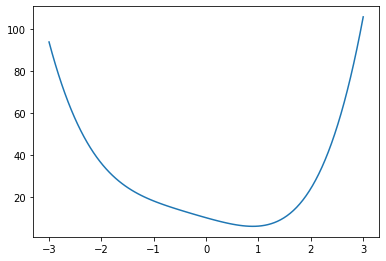

In [51]:
x = np.linspace(-3,3,100)

y = f(x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y)

plt.show()

In [52]:
x_min = optimize.fmin(f, 0)
print(x_min)

Optimization terminated successfully.
         Current function value: 5.894475
         Iterations: 24
         Function evaluations: 48
[0.8914375]


However if the function has multiple local minima the initial guess will determine which is found.

In [66]:
def g(x):
    return x**4 - x**3 - 5* x**2 + x + 0

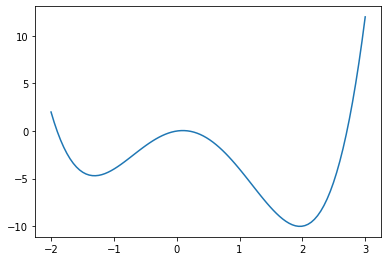

In [57]:
x = np.linspace(-2,3,100)

y = g(x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y)

plt.show()

In [81]:
x_min1 = optimize.fmin(g, -1)
print('x_min1 =',x_min1,'\n')

x_min2 = optimize.fmin(g, 1)
print('x_min2 =',x_min2)

Optimization terminated successfully.
         Current function value: -4.697455
         Iterations: 14
         Function evaluations: 28
x_min1 = [-1.3078125] 

Optimization terminated successfully.
         Current function value: -10.019646
         Iterations: 16
         Function evaluations: 32
x_min2 = [1.96025391]


## Global Optimization

We can find the global minimum of a function, within given bounds, using `scipy.optimize.differential_evolution(func,bounds)`. `bounds` will be a list of lists containing the max and min of the input parameters of `func`. It should be noted that this works best when `func` takes in one argument which is a list of the input parameters. Running this function returns the information about the optomisation process with the min value found stored as `x`.

In [79]:
result = scipy.optimize.differential_evolution(g,[[-2,3]])

print(result)

     fun: array([-10.01964635])
     jac: array([-1.42108548e-06])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 3
 success: True
       x: array([1.96027333])


A similar process can be achieved with multivariable functions too.

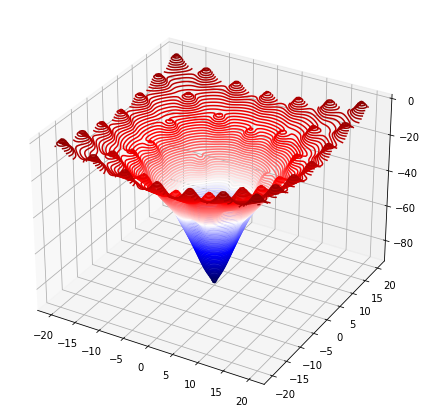

In [85]:
def f(params):
    return -100. * np.exp(-0.1*np.sqrt(params[0]**2 + params[1]**2)) + np.exp(np.cos(params[0]) + np.cos(params[1]))
    
x_bound = [-20,20]
y_bound = [-20,20]
    
xs = np.linspace(x_bound[0], x_bound[1], 100)
ys = np.linspace(y_bound[0], y_bound[1], 100)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh = f([Xmesh,Ymesh])

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

plt.show()

In [86]:
bounds = [x_bound,y_bound]
result = scipy.optimize.differential_evolution(f,bounds)

print(np.round(result.x,2))

[-0. -0.]


## Function Roots

The function `scipy.optimize.fsolve(f,x0)` finds the roots of a function `f`, given an initial guess array `x0`.

In [140]:
randy = rnd.random(3)

def f(x):
    return 0.25*randy[0]*x**2 - randy[1]*2*x - randy[2]

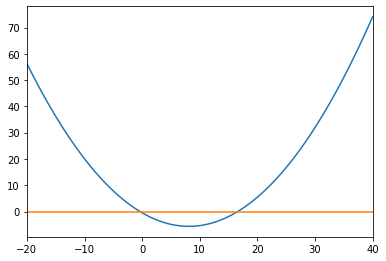

In [141]:
x = np.linspace(-20,40,100)

y = f(x)

y2 = np.zeros(len(x))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_xlim(x[0],x[-1])

ax.plot(x,y,x,y2)

plt.show()

In [142]:
roots = optimize.fsolve(f,[x[0],x[-1]])

print(roots)

print(np.round(f(roots),2))

[-0.37906637 16.59148356]
[-0.  0.]


## Optimize Least Square Fit

Lets try and fit a curve to the following noisy data.

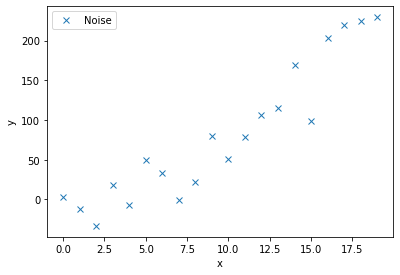

In [148]:
c1, c2 = 0.5, 2.0

x = np.arange(20)

y = c1*x**2 + c2*x

noise = y + 0.2 * np.max(y) * rnd.random(len(y))*((-1)**(2-(np.round(rnd.random(len(y)),0))))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

We will now define a function to model this curve, as well as a function that calculates the residuals. The residuals are the differrence between each noisy data point and the model being fitted. This `scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))` function gives back the coefficient `c` that minimises the residuals. We must input the noisy data, `noise`, and their corresponding `x` co-ordinates, as well as an intial guess for the coefficients `c_guess`.

[ 0.7283107  -0.65686655]


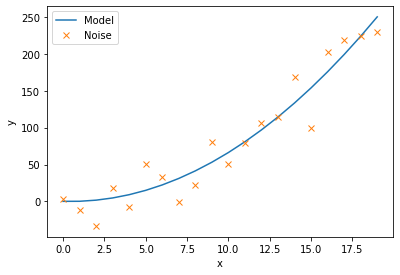

In [149]:
def model(x, c):
    return c[0]*x**2 + c[1]*x

def residuals(c,y,x):
    return y - model(x,c)

c_guess = np.array([0.0,2.1])

c_result, flag = scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))

print(c_result)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x, model(x,c_result), label='Model')
ax.plot(x, noise, 'x', label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

## Curve Fit

The `scipy.optimize.curve_fit(model,xdata,ydata,p0)` function allows us to directly input the `model` function aswell the noisy data, (`xdata`,`ydata`), along with an initial guess for the model coefficients `p0`. We must define our model function with indiviual coefficeients rather than an array of cefficients.

[ 0.72831071 -0.65686659]


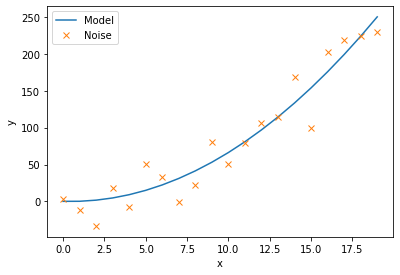

In [150]:
def model(x, c1, c2):
    return c1*x**2 + c2*x

c_result, flag = scipy.optimize.curve_fit(model,x,noise,p0=(0.5,2.0))

print(c_result)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,model(x,c_result[0],c_result[1]),label='Model')
ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()